<h1><strong> <center>Classifying Outfit with Pytorch</center></strong></h1>

In [ ]:
#instalo dependencias y bibliotecas
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [ ]:
# Download training data from open datasets.
training_data = datasets.Food101(
    root="data",
    split="train",
    download=True,
    transform=transforms.Compose([
        transforms.Resize((64, 64)), # Para que funcione correctamente redimensiono a 128x128
        transforms.ToTensor(),
    ]),
)


# Download test data from open datasets.
test_data = datasets.Food101(
    root="data",
    split="test",
    download=True,
    transform=transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
    ]),
)


100%|██████████| 5.00G/5.00G [03:56<00:00, 21.1MB/s]


Extracting data/food-101.tar.gz to data


In [ ]:
# Obtener las clases del dataset
class_names = training_data.classes

# Crear el label_dict
label_dict = {index: class_name for index, class_name in enumerate(class_names)}

# Imprimir el diccionario
print(label_dict)


{0: 'apple_pie', 1: 'baby_back_ribs', 2: 'baklava', 3: 'beef_carpaccio', 4: 'beef_tartare', 5: 'beet_salad', 6: 'beignets', 7: 'bibimbap', 8: 'bread_pudding', 9: 'breakfast_burrito', 10: 'bruschetta', 11: 'caesar_salad', 12: 'cannoli', 13: 'caprese_salad', 14: 'carrot_cake', 15: 'ceviche', 16: 'cheese_plate', 17: 'cheesecake', 18: 'chicken_curry', 19: 'chicken_quesadilla', 20: 'chicken_wings', 21: 'chocolate_cake', 22: 'chocolate_mousse', 23: 'churros', 24: 'clam_chowder', 25: 'club_sandwich', 26: 'crab_cakes', 27: 'creme_brulee', 28: 'croque_madame', 29: 'cup_cakes', 30: 'deviled_eggs', 31: 'donuts', 32: 'dumplings', 33: 'edamame', 34: 'eggs_benedict', 35: 'escargots', 36: 'falafel', 37: 'filet_mignon', 38: 'fish_and_chips', 39: 'foie_gras', 40: 'french_fries', 41: 'french_onion_soup', 42: 'french_toast', 43: 'fried_calamari', 44: 'fried_rice', 45: 'frozen_yogurt', 46: 'garlic_bread', 47: 'gnocchi', 48: 'greek_salad', 49: 'grilled_cheese_sandwich', 50: 'grilled_salmon', 51: 'guacamole

In [ ]:
print(training_data)

Dataset Food101
    Number of datapoints: 75750
    Root location: data
    split=train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [ ]:
type(training_data)


torchvision.datasets.food101.Food101

In [ ]:
dataset_length = len(training_data)

print("The length of the dataset is {0:d}".format(dataset_length))

The length of the dataset is 75750


In [ ]:
#Extraemos un elemento aleatorio para comprobar el tipo de dato

data_type = type(training_data[2500])

print("The type of data you have extracted from FGVCAircraft is {0:s}".format(str(data_type)))

The type of data you have extracted from FGVCAircraft is <class 'tuple'>


In [ ]:
# Compruebo el tipo de dato del primer elemento de la tupla

first_part_tuple = training_data[100][0]

type_first_element = type(first_part_tuple)

print("The first part of the tuple is a {0:s}".format(str(type_first_element)))


The first part of the tuple is a <class 'torch.Tensor'>


# 4. Building the Machine Learning model

<strong>Exercise 4: </strong> Check out the data type of the first element of the tuple and print it

Ok now we are in front of our first Pytorch Tensor. Let's learn cool stuff about it

<strong>Exercise 5: </strong> Show the shape of the tensor

In [ ]:
### Your code starts here ###

shape = first_part_tuple.size()

### Your code ends here ###

print("The shape of the Torch tensor is {0:s}".format(str(shape)))

The shape of the Torch tensor is torch.Size([3, 64, 64])


Maplotlib expects the three RGB matrices as the third dimension, MNIST library provides the three RGB matrices as the first dimension, let's reshape our matrix to fit matplotlib requirements.

<strong>Exercise 5: </strong> Reshape the dimensions of your first_part_tuple variable to get [28,28,1] instead of [1,28,28]

In [ ]:
### Your code starts here ###

permuted_picture =  first_part_tuple.permute(1, 2, 0)

### Your code ends here ###

print ("The shape of the permuted image is now: {0:s}".format(str(permuted_picture.size())))

The shape of the permuted image is now: torch.Size([64, 64, 3])


Now maplotlib will be able to draw the picture, let's try it

<strong>Exercise 6: </strong> Draw the picture represented in the variable permuted_picture

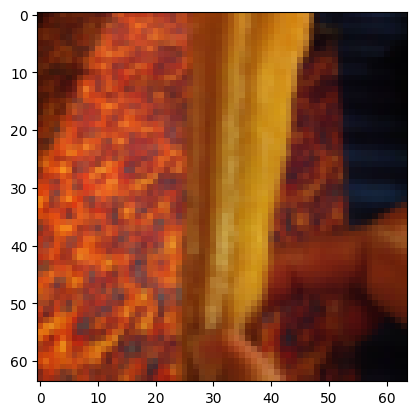

In [ ]:
### Your code starts here ###

plt.imshow(permuted_picture, vmin=0, vmax=1)

### Your code ends here ###

Ok now we can see what it looks like a dress! We know what the first element of the tuple contains. It contains a picture of a piece of clothe. But, what does the second part of the tuple represent? Let's check out the value the second part of the tuple contains

<strong>Exercise 7: </strong> Check the value of the second element of the 2500th tuple

In [ ]:
### Your code starts here ###

second_value =  training_data[2500][1]

### Your code ends here ###

print("The second value of the tuple place in the 2500th position is {0}".format(second_value))


The second value of the tuple place in the 2500th position is 86


<strong>Exercise 8: </strong> Take a while to have a glance at different pictures and their label. Change the value of variable pic to see other outfits.

The picture in the position number 3596 is a pork_chop


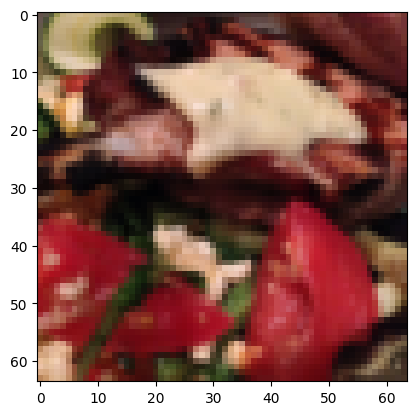

In [ ]:
pic = 3596

label_dict = {
    0: 'apple_pie',
    1: 'baby_back_ribs',
    2: 'baklava',
    3: 'beef_carpaccio',
    4: 'beef_tartare',
    5: 'beet_salad',
    6: 'beignets',
    7: 'bibimbap',
    8: 'bread_pudding',
    9: 'breakfast_burrito',
    10: 'bruschetta',
    11: 'caesar_salad',
    12: 'cannoli',
    13: 'caprese_salad',
    14: 'carrot_cake',
    15: 'ceviche',
    16: 'cheese_plate',
    17: 'cheesecake',
    18: 'chicken_curry',
    19: 'chicken_quesadilla',
    20: 'chicken_wings',
    21: 'chocolate_cake',
    22: 'chocolate_mousse',
    23: 'churros',
    24: 'clam_chowder',
    25: 'club_sandwich',
    26: 'crab_cakes',
    27: 'creme_brulee',
    28: 'croque_madame',
    29: 'cup_cakes',
    30: 'deviled_eggs',
    31: 'donuts',
    32: 'dumplings',
    33: 'edamame',
    34: 'eggs_benedict',
    35: 'escargots',
    36: 'falafel',
    37: 'filet_mignon',
    38: 'fish_and_chips',
    39: 'foie_gras',
    40: 'french_fries',
    41: 'french_onion_soup',
    42: 'french_toast',
    43: 'fried_calamari',
    44: 'fried_rice',
    45: 'frozen_yogurt',
    46: 'garlic_bread',
    47: 'gnocchi',
    48: 'greek_salad',
    49: 'grilled_cheese_sandwich',
    50: 'grilled_salmon',
    51: 'guacamole',
    52: 'gyoza',
    53: 'hamburger',
    54: 'hot_and_sour_soup',
    55: 'hot_dog',
    56: 'huevos_rancheros',
    57: 'hummus',
    58: 'ice_cream',
    59: 'lasagna',
    60: 'lobster_bisque',
    61: 'lobster_roll_sandwich',
    62: 'macaroni_and_cheese',
    63: 'macarons',
    64: 'miso_soup',
    65: 'mussels',
    66: 'nachos',
    67: 'omelette',
    68: 'onion_rings',
    69: 'oysters',
    70: 'pad_thai',
    71: 'paella',
    72: 'pancakes',
    73: 'panna_cotta',
    74: 'peking_duck',
    75: 'pho',
    76: 'pizza',
    77: 'pork_chop',
    78: 'poutine',
    79: 'prime_rib',
    80: 'pulled_pork_sandwich',
    81: 'ramen',
    82: 'ravioli',
    83: 'red_velvet_cake',
    84: 'risotto',
    85: 'samosa',
    86: 'sashimi',
    87: 'scallops',
    88: 'seaweed_salad',
    89: 'shrimp_and_grits',
    90: 'spaghetti_bolognese',
    91: 'spaghetti_carbonara',
    92: 'spring_rolls',
    93: 'steak',
    94: 'strawberry_shortcake',
    95: 'sushi',
    96: 'tacos',
    97: 'takoyaki',
    98: 'tiramisu',
    99: 'tuna_tartare',
    100: 'waffles'
}



### Your code starts here ###

picture = training_data[pic][0]
permuted_picture = picture.permute(1, 2, 0)
plt.imshow(permuted_picture,vmin=0,vmax=1)

### Your code ends here ###

print("The picture in the position number {0:d} is a {1:s}".format(pic,label_dict[training_data[pic][1]]))



## Structuring datasets

We are going to pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [ ]:
batch_size = 32

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([32, 3, 64, 64])
Shape of y: torch.Size([32]) torch.int64


## Creating the Machine Learning model

### Enabling GPU hardware

Machine Learning foundations are based on Linear Algebra and number crunching with matrices. In order to make calculations with this huge amount of matrices, there exists specific hardware designed to speed this calculation up. This hardware is commonly called Graphics Processing Unit or <strong>GPU</strong>.
Let's check if your computer has a GPU available for this project

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print("I have found {0:s} device".format(device))

I have found cuda device


As it's shown above, Pytorch includes a subclass named cuda in order to deal with GPU hardware. Let's figure out the name of the GPU your computer has installed.

In [ ]:
if torch.cuda.is_available():
    print("There is a GPU available with the name {0:s}".format(torch.cuda.get_device_name(0)))
    torch.cuda.get_device_name(0)

There is a GPU available with the name Tesla T4


### Define your first Neural Network

All hands on deck! Your're ready to build your first neural network. First of all let's briefly describe what a Neural Network is:

A neural network is a type of machine learning algorithm that is modeled after the structure and function of the human brain.
It consists of a set of interconnected nodes or "neurons" organized into layers. Each neuron takes input from the neurons in the previous layer, performs a computation, and then passes its output to the next layer of neurons. Each neuron is composed of two parts:
* <strong>A linear equation</strong>: it has the form y = w * x + b where:
    * x is the input of the previous neuron
    * w is the weight, the machine learning model will adjust the value of the weights in order to fit the model
    * b is the bias, the machine learning model will adjust the value of the bias in order to fit the model
* <strong>An activation function</strong>: tt determines whether the neuron should "fire" and transmit its output to the next layer of neurons or not. The activation function introduces non-linearities into the network, which enables it to learn complex patterns in the input data. There are many different types of activation functions, each with its own advantages and disadvantages, in this example we will use the RELU activation function

Depending on the number of layers, there are several types of neural networks, the following picture shows some of them:

![neural_types-3.png](attachment:neural_types-3.png)

The presence of an activation function differentiates the Logistic Regression from the Linear Regression. The presence of more than one hidden layer differentiates the Deep Neural Network from the Shallow Neural Network

It's a good practice to draw a sketch of the network you want to implement. The sketch should show the dimensions of the input, and how the number of neurons changes throughout your architecture. Please have a glance at our proposal of neural network.

![architecture.png](attachment:architecture.png)

#### Build the architecture

In [ ]:
# Define model
import torch.nn.functional as F


class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        # Ajustar el tamaño de entrada para imágenes con 3 canales (RGB)
        self.Linear1 = nn.Linear(3 * 64 * 64, 1024)
        self.Linear2 = nn.Linear(1024, 512)
        self.Linear3 = nn.Linear(512, 101)

    def forward(self, input):
        x = self.flatten(input)  # Aplana el tensor (N, 3, 128, 128) -> (N, 3*128*128)
        x = F.relu(self.Linear1(x))  # Pasa por la primera capa
        x = F.relu(self.Linear2(x))  # Pasa por la segunda capa
        output = self.Linear3(x)  # Capa de salida (sin activación, se usa durante entrenamiento)
        return output


# Asigna el modelo al dispositivo (GPU/CPU)
model = MyNeuralNetwork().to(device)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        # Menos capas convolucionales debido al tamaño reducido de las imágenes
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Mantiene la dimensión 32x32
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Mantiene la dimensión 32x32
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)  # Reduce la dimensión a 16x16

        # Aumentando capas convolucionales para extraer más características antes del pooling
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Mantiene la dimensión 16x16
        self.bn3 = nn.BatchNorm2d(128)

        # Una capa de pooling adicional que reduce la dimensión a 8x8
        self.pool2 = nn.MaxPool2d(2, 2)

        # Capas fully connected ajustadas al tamaño de salida de las capas convolucionales
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 101)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool2(F.relu(self.bn3(self.conv3(x))))

        # Aplanando el tensor para las capas fully connected
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.fc3(x)  # Sin activación ReLU antes de la salida
        return x

# Asigna el modelo al dispositivo (GPU/CPU)
model = MyNeuralNetwork().to(device)

We've defined our Neural Network, you can use the print instruction to check out some information of what you've created

In [ ]:
print(model)

MyNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=12288, out_features=1024, bias=True)
  (Linear2): Linear(in_features=1024, out_features=512, bias=True)
  (Linear3): Linear(in_features=512, out_features=101, bias=True)
)


<strong>Exercise 9</strong>: Modify your neural network in order to include an additional hidden layer of 1024 neurons. Insert your new hidden layer between the current layer 2 and layer 3.

In [ ]:
### Your code starts here ###

class MyAlternativeNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(3*256*256,1024)
        self.Linear3 = nn.Linear(1024,512)
        self.Linear4 = nn.Linear(512,10)

    def forward(self, input):
        x = self.flatten(input)
        x = F.relu(self.Linear1(x))
        x = F.relu(self.Linear2(x))
        x = F.relu(self.Linear3(x))
        output = F.relu(self.Linear4(x))
        return output


my_other_model = MyAlternativeNeuralNetwork().to(device)

### Your code ends here

print(my_other_model)

MyAlternativeNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=196608, out_features=1024, bias=True)
  (Linear3): Linear(in_features=1024, out_features=512, bias=True)
  (Linear4): Linear(in_features=512, out_features=10, bias=True)
)


#### Define the loss Function

The loss function is the method of evaluating how well your algorithm models the given data. If predictions of your model deviate too much from actual results, loss function would output a very large number. If your model is doing well, the loss function will output a low number.

Gradually, with the help of the optimization function, loss function learns to reduce the error in prediction.

Pytorch provides you with a complete toolbox with most used loss functions in Machine Learning. Please visit the following link for more information: <a> https://pytorch.org/docs/stable/nn.html#loss-functions </a>

<strong> Exercise 10: </strong> Set the Cross Entropy Loss function as the loss function for your experiment

In [ ]:
### Your code starts here ###

loss_fn = nn.CrossEntropyLoss()

### Your code ends here ###

#### Define the Optimization Function

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and bias in order to reduce the loss provided by the loss function.

As in the loss function case, Pytorch provides a full set of optimization algorithms that fits your optimization requirements. Please have a look at the following link to learn more about optimization algorithms. <a> https://pytorch.org/docs/stable/optim.html </a>

<strong> Exercise 11: </strong> Set up the Stochastic Gradient Descent Algorithm with a learning rate = 1e-3

In [ ]:
### Your code starts here ###

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

### Your code ends here ###

#### Building the training loop

Now we have all the tools to train our model. Training a model is an iterative process performed by a for loop. The training process is built with four bricks:
* <strong>forward pass</strong>: in this step we plug in a batch of our training data and get the output. Then we compare the result of our model and the actual data.
* <strong>backward pass</strong>: this step deals with the math neccesary to make the optimization work. We will dig into this step in the next code challenge
* <strong>optimization</strong>: here we modify the weights and bias of our model in order to approach our results to the actual data and, therefore, minimize the loss
* <strong>repetition</strong>: we repeat the algorithm as many times the number of epochs defines.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        predicted = model(X)
        loss = loss_fn(predicted, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Optimization
        optimizer.step()

        # printing the loss every 100 epoc
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print("Loss with batch nº {0:d}: {1:.6f}".format(current,loss))

Take a while to get how the train loop works, you will get better understanding if you print how the loop runs through the dataloader.

<strong>Exercise 12</strong>: Write down a loop to print the number of batch with the shape of every single train batch (X) and its label (y).

In [ ]:
### Your code starts here ###

for batch, (X, y) in enumerate(train_dataloader):
    print("X {0:d}: {1:s}".format(batch,str(X.size())))
    print("y {0:d}: {1:s}".format(batch,str(y.size())))

### Your code ends here ###

X 0: torch.Size([32, 3, 64, 64])
y 0: torch.Size([32])
X 1: torch.Size([32, 3, 64, 64])
y 1: torch.Size([32])
X 2: torch.Size([32, 3, 64, 64])
y 2: torch.Size([32])
X 3: torch.Size([32, 3, 64, 64])
y 3: torch.Size([32])
X 4: torch.Size([32, 3, 64, 64])
y 4: torch.Size([32])
X 5: torch.Size([32, 3, 64, 64])
y 5: torch.Size([32])
X 6: torch.Size([32, 3, 64, 64])
y 6: torch.Size([32])
X 7: torch.Size([32, 3, 64, 64])
y 7: torch.Size([32])
X 8: torch.Size([32, 3, 64, 64])
y 8: torch.Size([32])
X 9: torch.Size([32, 3, 64, 64])
y 9: torch.Size([32])
X 10: torch.Size([32, 3, 64, 64])
y 10: torch.Size([32])
X 11: torch.Size([32, 3, 64, 64])
y 11: torch.Size([32])
X 12: torch.Size([32, 3, 64, 64])
y 12: torch.Size([32])
X 13: torch.Size([32, 3, 64, 64])
y 13: torch.Size([32])
X 14: torch.Size([32, 3, 64, 64])
y 14: torch.Size([32])
X 15: torch.Size([32, 3, 64, 64])
y 15: torch.Size([32])
X 16: torch.Size([32, 3, 64, 64])
y 16: torch.Size([32])
X 17: torch.Size([32, 3, 64, 64])
y 17: torch.Size(

Once you've printed the whole loop and the shape of the matrices your are plugging into the model, everything seems to be clear enough. In a cell shown above, we figured out the number of samples the training dataset contains: 60000 pictures.
60000 / 64 = 937 batches of 64 samples and a last batch with 32 samples

So the training loop will run <strong>937 times</strong> loading <strong>64 samples</strong> of the training dataset and a last time with 1 batch of 32 samples

#### Define the Test Function

Once we've defined our training function we can test our model to check out if the model can predict what type of clothing we have in every single sample of the test dataset


75750/32=2.367

<strong>Exercise 13</strong>: Print the number of samples included in the test dataset

In [ ]:
### Your code starts here ###

dataset_len = len(test_data)

### Your code ends here ###

print("The number of samples included in the test dataset is: {0:d}".format(dataset_len))

The number of samples included in the test dataset is: 25250


In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss = test_loss / num_batches

    accuracy = (correct / size) * 100

    print("Test Error: \n Accuracy: {0:.2f} %, Average loss: {1:.6f}".format(accuracy,avg_loss))

### Putting all together

Everything is ready to go. Now we can run train and test functions. Let's run the machine

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"\nEpoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("\nTraining done!")


Epoch 1
-------------------------------
Loss with batch nº 32: 4.570275
Loss with batch nº 3232: 4.218147
Loss with batch nº 6432: 1.894966
Loss with batch nº 9632: 0.691009
Loss with batch nº 12832: 6.903081
Loss with batch nº 16032: 3.293015
Loss with batch nº 19232: 0.675189
Loss with batch nº 22432: 0.391697
Loss with batch nº 25632: 5.116874
Loss with batch nº 28832: 2.275985
Loss with batch nº 32032: 0.573859
Loss with batch nº 35232: 0.703194
Loss with batch nº 38432: 4.635637
Loss with batch nº 41632: 2.720121
Loss with batch nº 44832: 1.316600
Loss with batch nº 48032: 7.208776
Loss with batch nº 51232: 3.472745
Loss with batch nº 54432: 2.127327
Loss with batch nº 57632: 0.722999
Loss with batch nº 60832: 5.709644
Loss with batch nº 64032: 4.401883
Loss with batch nº 67232: 2.043000
Loss with batch nº 70432: 0.674252
Loss with batch nº 73632: 5.335702
Test Error: 
 Accuracy: 0.99 %, Average loss: 6.515120

Epoch 2
-------------------------------
Loss with batch nº 32: 7.7204

### Saving the Pytorch model

You can reuse your trained model whenever you want. To do that, you have to save it first

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

### Loading a saved Pytorch model

You can use your saved model for further predictions. For this purpose, please load it first.

In [ ]:
model = MyNeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

### Predicting type of outfit

Now you can use your model to predict wich of the outfit included in the experiment is present in your picture. Next function gives you the ability to use the model to do so

In [ ]:
def aircraft_predictor(aircraft,model):
    classes = [
      'apple_pie',
      'baby_back_ribs',
      'baklava',
      'beef_carpaccio',
      'beef_tartare',
      'beet_salad',
      'beignets',
      'bibimbap',
      'bread_pudding',
      'breakfast_burrito',
      'bruschetta',
      'caesar_salad',
      'cannoli',
      'caprese_salad',
      'carrot_cake',
      'ceviche',
      'cheese_plate',
      'cheesecake',
      'chicken_curry',
      'chicken_quesadilla',
      'chicken_wings',
      'chocolate_cake',
      'chocolate_mousse',
      'churros',
      'clam_chowder',
      'club_sandwich',
      'crab_cakes',
      'creme_brulee',
      'croque_madame',
      'cup_cakes',
      'deviled_eggs',
      'donuts',
      'dumplings',
      'edamame',
      'eggs_benedict',
      'escargots',
      'falafel',
      'filet_mignon',
      'fish_and_chips',
      'foie_gras',
      'french_fries',
      'french_onion_soup',
      'french_toast',
      'fried_calamari',
      'fried_rice',
      'frozen_yogurt',
      'garlic_bread',
      'gnocchi',
      'greek_salad',
      'grilled_cheese_sandwich',
      'grilled_salmon',
      'guacamole',
      'gyoza',
      'hamburger',
      'hot_and_sour_soup',
      'hot_dog',
      'huevos_rancheros',
      'hummus',
      'ice_cream',
      'lasagna',
      'lobster_bisque',
      'lobster_roll_sandwich',
      'macaroni_and_cheese',
      'macarons',
      'miso_soup',
      'mussels',
      'nachos',
      'omelette',
      'onion_rings',
      'oysters',
      'pad_thai',
      'paella',
      'pancakes',
      'panna_cotta',
      'peking_duck',
      'pho',
      'pizza',
      'pork_chop',
      'poutine',
      'prime_rib',
      'pulled_pork_sandwich',
      'ramen',
      'ravioli',
      'red_velvet_cake',
      'risotto',
      'samosa',
      'sashimi',
      'scallops',
      'seaweed_salad',
      'shrimp_and_grits',
      'spaghetti_bolognese',
      'spaghetti_carbonara',
      'spring_rolls',
      'steak',
      'strawberry_shortcake',
      'sushi',
      'tacos',
      'takoyaki',
      'tiramisu',
      'tuna_tartare',
      'waffles'
    ]


    x, y = aircraft[0], aircraft[1]
    model.eval()
    with torch.no_grad():
        pred = model(x)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        return predicted,actual




<strong>Exercise 14</strong>: Choose any picture of the dataset and test if the model predicts what type of outfit it is. For example the picture number 7001

In [ ]:
### Your code starts here ###

aircaft = test_data[1000]

predicted,actual = aircraft_predictor(aircaft,model)

### Your code ends here ###

print("Predicted: {0:s}, Actual: {1:s}".format(predicted,actual))

As final drill, let's make a photo to any outfit you have available just now and check if the model is able to predict what it is. The next function takes the picture and predicts what it is.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def outfit_predict_from_image(url,model):

    classes = [
      'apple_pie',
      'baby_back_ribs',
      'baklava',
      'beef_carpaccio',
      'beef_tartare',
      'beet_salad',
      'beignets',
      'bibimbap',
      'bread_pudding',
      'breakfast_burrito',
      'bruschetta',
      'caesar_salad',
      'cannoli',
      'caprese_salad',
      'carrot_cake',
      'ceviche',
      'cheese_plate',
      'cheesecake',
      'chicken_curry',
      'chicken_quesadilla',
      'chicken_wings',
      'chocolate_cake',
      'chocolate_mousse',
      'churros',
      'clam_chowder',
      'club_sandwich',
      'crab_cakes',
      'creme_brulee',
      'croque_madame',
      'cup_cakes',
      'deviled_eggs',
      'donuts',
      'dumplings',
      'edamame',
      'eggs_benedict',
      'escargots',
      'falafel',
      'filet_mignon',
      'fish_and_chips',
      'foie_gras',
      'french_fries',
      'french_onion_soup',
      'french_toast',
      'fried_calamari',
      'fried_rice',
      'frozen_yogurt',
      'garlic_bread',
      'gnocchi',
      'greek_salad',
      'grilled_cheese_sandwich',
      'grilled_salmon',
      'guacamole',
      'gyoza',
      'hamburger',
      'hot_and_sour_soup',
      'hot_dog',
      'huevos_rancheros',
      'hummus',
      'ice_cream',
      'lasagna',
      'lobster_bisque',
      'lobster_roll_sandwich',
      'macaroni_and_cheese',
      'macarons',
      'miso_soup',
      'mussels',
      'nachos',
      'omelette',
      'onion_rings',
      'oysters',
      'pad_thai',
      'paella',
      'pancakes',
      'panna_cotta',
      'peking_duck',
      'pho',
      'pizza',
      'pork_chop',
      'poutine',
      'prime_rib',
      'pulled_pork_sandwich',
      'ramen',
      'ravioli',
      'red_velvet_cake',
      'risotto',
      'samosa',
      'sashimi',
      'scallops',
      'seaweed_salad',
      'shrimp_and_grits',
      'spaghetti_bolognese',
      'spaghetti_carbonara',
      'spring_rolls',
      'steak',
      'strawberry_shortcake',
      'sushi',
      'tacos',
      'takoyaki',
      'tiramisu',
      'tuna_tartare',
      'waffles'
    ]
    # Converting to gray-scale picture (just one matrix instead of three RGB matrices)
    img = Image.open(url).convert('L')

    # Resizing to (28,28
    image = np.array(img.resize((28, 28)))/255

    # Adding one dimension to fit the shape Pytorch expects
    image = image.reshape(1,28,28)

    # Converting to Torch tensor
    torch_image = torch.from_numpy(image)

    # Flattening the 28,28 matrix (check the model architecture) and converting to float number type
    torch_image = torch_image.reshape(1,28*28).float()

    # Predicting
    with torch.no_grad():
        pred = model(torch_image)

    # Matching the prediction with the type of outfit
    predicted = classes[pred[0].argmax(0)]

    return(predicted,image)

<strong>Exercise 15</strong>: Use the function coded below to predict the outfit you've just made a picture of.

In [ ]:
### Your code starts here ###

outfit_prediction,image = outfit_predict_from_image ('./images/outfit_example.png',model)

### Your code ends here ###

print('The machine has predicted that your picture is a {0:s}.'.format(outfit_prediction))

In [ ]:
plt.imshow(image.reshape(28,28),cmap='gray',vmin=0,vmax=1)


<strong>Exercise 16</strong>: Try to improve the Accuracy of your model. What should you do? Wich of all parameters shown above should you modify?